In [132]:
# !scp alfa:learn_to_prime/informative_eval_cleaned.tsv .

In [133]:
import pandas as pd
df = pd.read_csv("informative_eval_final.tsv", sep="\t", names=["model", "dataset", "prompt", "random_demos", "informative_demos", "difference"])
# temp fix: to be removed
# import itertools
# df["prompt"] = list(itertools.chain(*[[i]*200 for i in range(len(df)//200)]))
df

,model,dataset,prompt,random_demos,informative_demos,difference
0,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,GPT-3 style,0.31000,0.57000,0.26000
1,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,GPT-3 style,0.27000,0.53000,0.26000
2,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,GPT-3 style,0.42000,0.52000,0.10000
3,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,GPT-3 style,0.43000,0.46000,0.03000
4,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,GPT-3 style,0.31000,0.45000,0.14000
...,...,...,...,...,...,...
56195,davinci,worldtree,no template,0.79308,0.77418,-0.01890
56196,davinci,worldtree,no template,0.71944,0.81067,0.09122
56197,davinci,worldtree,no template,0.78127,0.78744,0.00618
56198,davinci,worldtree,no template,0.76735,0.83254,0.06519


In [134]:
df.groupby(["model", "dataset", "prompt"]).mean().tail(10)

random_demos  \
model                                              dataset               prompt                                        
trained_models/mt5_teabreac_random+AQA_random_c... hotpot_qa/fullwiki    generate_answer_affirmative        0.145908   
                                                                         generate_answer_interrogative      0.142550   
                                                   openbookqa/additional choices                            0.346351   
                                                                         choose_an_answer_with_options      0.330079   
                                                                         only_options                       0.409877   
                                                                         pick_answer_with_options           0.326281   
                                                                         pick_using_id                      0.037150   
                                                                         which_correct                      0.359039   
                                                                         which_correct_inverse              0.479658   
                                                   worldtree             no template                        0.413401   

                                                                                                        informative_demos  \
model                                              dataset               prompt                                             
trained_models/mt5_teabreac_random+AQA_random_c... hotpot_qa/fullwiki    generate_answer_affirmative             0.119571   
                                                                         generate_answer_interrogative           0.118608   
                                                   openbookqa/additional choices                                 0.367173   
                                                                         choose_an_answer_with_options           0.346216   
                                                                         only_options                            0.405422   
                                                                         pick_answer_with_options                0.333940   
                                                                         pick_using_id                           0.041900   
                                                                         which_correct                           0.355430   
                                                                         which_correct_inverse                   0.440658   
                                                   worldtree             no template                             0.358222   

                                                                                                        difference  
model                                              dataset               prompt                                     
trained_models/mt5_teabreac_random+AQA_random_c... hotpot_qa/fullwiki    generate_answer_affirmative     -0.026337  
                                                                         generate_answer_interrogative   -0.023942  
                                                   openbookqa/additional choices                          0.020821  
                                                                         choose_an_answer_with_options    0.016137  
                                                                         only_options                    -0.004455  
                                                                         pick_answer_with_options         0.007660  
                                                                         pick_using_id                    0.004750  
                                                                         which_correct                   -0.0

In [135]:
# df.apply(lambda row: str(row["model"]) + str(row["dataset"]), axis=1).value_counts()

In [136]:
max_vals = df.groupby(["model", "dataset", "prompt"]).mean()["informative_demos"].groupby(["model", "dataset"]).idxmax().tolist()
# max_vals.reset_index("prompt")
# max_vals

In [137]:
max_vals

[('allenai/tk-instruct-11b-def-pos', 'glue/mnli', 'does it follow that'),
 ('allenai/tk-instruct-11b-def-pos',
  'hotpot_qa/fullwiki',
  'generate_answer_interrogative'),
 ('allenai/tk-instruct-11b-def-pos', 'openbookqa/additional', 'choices'),
 ('allenai/tk-instruct-11b-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-3b-def-pos', 'glue/mnli', 'always/sometimes/never'),
 ('allenai/tk-instruct-3b-def-pos',
  'hotpot_qa/fullwiki',
  'generate_answer_affirmative'),
 ('allenai/tk-instruct-3b-def-pos', 'openbookqa/additional', 'which_correct'),
 ('allenai/tk-instruct-3b-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-base-def-pos', 'glue/mnli', 'must be true'),
 ('allenai/tk-instruct-base-def-pos',
  'hotpot_qa/fullwiki',
  'generate_answer_affirmative'),
 ('allenai/tk-instruct-base-def-pos',
  'openbookqa/additional',
  'choose_an_answer_with_options'),
 ('allenai/tk-instruct-base-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-large-def-pos', 'glu

In [138]:
max_info_df = df[df.apply(lambda row: tuple(row[["model", "dataset", "prompt"]]) in max_vals, axis=1)]
max_info_df

,model,dataset,prompt,random_demos,informative_demos,difference
400,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.39000,0.56000,0.17000
401,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.34000,0.56000,0.22000
402,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.28000,0.55000,0.27000
403,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.33000,0.56000,0.23000
404,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.36000,0.62000,0.26000
...,...,...,...,...,...,...
56195,davinci,worldtree,no template,0.79308,0.77418,-0.01890
56196,davinci,worldtree,no template,0.71944,0.81067,0.09122
56197,davinci,worldtree,no template,0.78127,0.78744,0.00618
56198,davinci,worldtree,no template,0.76735,0.83254,0.06519


In [139]:
max_info_df.model.unique()

array(['trained_models/mt5_teabreac+AQA_hard_large_ch3000',
       'allenai/tk-instruct-large-def-pos', 'google/flan-t5-large',
       'allenai/tk-instruct-3b-def-pos', 'google/flan-t5-xl',
       'bigscience/T0_3B', 'allenai/tk-instruct-11b-def-pos',
       'google/flan-t5-xxl', 'bigscience/T0pp',
       'allenai/tk-instruct-base-def-pos', 'text-davinci-003',
       'trained_models/mt5_teabreac_random+AQA_random_ch5000', 'davinci'],
      dtype=object)

In [140]:
random_portion_df = max_info_df.copy()
del random_portion_df["informative_demos"]
random_portion_df["acc"] = random_portion_df["random_demos"]
random_portion_df["type"] = "random"

del random_portion_df["random_demos"]

info_portion_df = max_info_df.copy()
del info_portion_df["random_demos"]
info_portion_df["acc"] = info_portion_df["informative_demos"]
info_portion_df["type"] = "info"

del info_portion_df["informative_demos"]

joint_df = pd.concat([random_portion_df, info_portion_df])

## Adjustments for plotting into the paper

In [141]:
joint_df.head(5)

,model,dataset,prompt,difference,acc,type
400,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.17,0.39,random
401,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.22,0.34,random
402,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.27,0.28,random
403,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.23,0.33,random
404,trained_models/mt5_teabreac+AQA_hard_large_ch3000,glue/mnli,always/sometimes/never,0.26,0.36,random


In [142]:
plotted_model_names = {
                       "allenai/tk-instruct-base-def-pos": "Tk-instruct-0.5B",
                       # "trained_models/AQA+SQAD_random_large_ch6000": "Tk-QA-random (1.3B)",  # TODO: we need random model
                       "trained_models/mt5_teabreac_random+AQA_random_ch5000": "Tk-QA-random-1B",
                       "trained_models/mt5_teabreac+AQA_hard_large_ch3000": "Tk-CQA-1B",
                       "allenai/tk-instruct-large-def-pos": "Tk-instruct-1B",
                       "google/flan-t5-large": "Flan-1B",
                       "allenai/tk-instruct-3b-def-pos": "Tk-instruct-3B",
                       "allenai/mtk-instruct-3b-def-pos": "mTk-instruct-3B",
                       "bigscience/T0_3B": "T0-3B",
                       "google/flan-t5-xl": "Flan-3B",
                       "allenai/tk-instruct-11b-def-pos": "Tk-instruct-11B",
                       "bigscience/T0pp": "T0-11B",
                       "google/flan-t5-xxl": "Flan-11B",
                       "davinci": "GPT3-175B",
                       "text-davinci-003": "InstructGPT-175B"}

plotted_df = pd.DataFrame()

for current_id, new_id in plotted_model_names.items():
    orig_df = joint_df[joint_df["model"] == current_id] 
    new_df = orig_df.copy()
    new_df["model"] = new_id
    
    plotted_df = pd.concat([plotted_df, new_df])
    
plotted_df.loc[plotted_df["type"] == "info", "type"] = "shared concept"

plotted_df["Demonstrations selection"] = plotted_df["type"]
del plotted_df["type"]

plotted_df["ROUGE"] = plotted_df["acc"]
del plotted_df["acc"]

# not-a-heldout-task
updated_idx = plotted_df[(plotted_df["dataset"].isin(("openbookqa/additional", "hotpot_qa/fullwiki"))) & (plotted_df["model"].apply(lambda name: "Tk-instruct" in name))].index
plotted_df.loc[updated_idx, "model"] = plotted_df.loc[updated_idx, "model"].apply(lambda name: "$^*$"+name)

updated_idx = plotted_df[(plotted_df["dataset"].isin(("openbookqa/additional", "hotpot_qa/fullwiki"))) & (plotted_df["model"].apply(lambda name: "T0" in name))].index
plotted_df.loc[updated_idx, "model"] = plotted_df.loc[updated_idx, "model"].apply(lambda name: "$^*$"+name)

updated_idx = plotted_df[(plotted_df["dataset"].isin(("openbookqa/additional", "hotpot_qa/fullwiki"))) & (plotted_df["model"].apply(lambda name: "Flan" in name))].index
plotted_df.loc[updated_idx, "model"] = plotted_df.loc[updated_idx, "model"].apply(lambda name: "$^*$"+name)


plotted_df.head()

,model,dataset,prompt,difference,Demonstrations selection,ROUGE
47400,Tk-instruct-0.5B,glue/mnli,must be true,0.27,random,0.26
47401,Tk-instruct-0.5B,glue/mnli,must be true,0.31,random,0.24
47402,Tk-instruct-0.5B,glue/mnli,must be true,0.33,random,0.24
47403,Tk-instruct-0.5B,glue/mnli,must be true,0.37,random,0.27
47404,Tk-instruct-0.5B,glue/mnli,must be true,0.34,random,0.19


In [143]:
plotted_df[plotted_df["model"].apply(lambda name: "Flan" in name)]

,model,dataset,prompt,difference,Demonstrations selection,ROUGE
10000,Flan-1B,glue/mnli,GPT-3 style,0.01000,random,0.53000
10001,Flan-1B,glue/mnli,GPT-3 style,-0.16000,random,0.68000
10002,Flan-1B,glue/mnli,GPT-3 style,-0.10000,random,0.65000
10003,Flan-1B,glue/mnli,GPT-3 style,0.13000,random,0.50000
10004,Flan-1B,glue/mnli,GPT-3 style,0.06000,random,0.50000
...,...,...,...,...,...,...
39395,$^*$Flan-11B,hotpot_qa/fullwiki,generate_answer_interrogative,-0.03317,shared concept,0.68250
39396,$^*$Flan-11B,hotpot_qa/fullwiki,generate_answer_interrogative,0.03850,shared concept,0.69750
39397,$^*$Flan-11B,hotpot_qa/fullwiki,generate_answer_interrogative,0.00650,shared concept,0.67317
39398,$^*$Flan-11B,hotpot_qa/fullwiki,generate_answer_interrogative,-0.00733,shared concept,0.70833


## Actual plotting

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (3.7, 5.2)})
# sns.set(rc={'figure.figsize': (10, 8)})
sns.set(style="whitegrid")
sns.set_palette("muted")


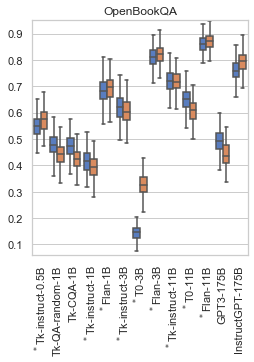

In [156]:
plt.xticks(rotation=90)
plt.title("OpenBookQA")

# sns.boxplot(data=plotted_df[plotted_df["dataset"] == "openbookqa/additional"], x="model", y="ROUGE", hue="Demonstrations selection", 
#             showfliers=False, showbox=False, showcaps=False, manage_ticks=False, palette="ocean", whis=[2.5,97.5])

g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "openbookqa/additional"], x="model", y="ROUGE", hue="Demonstrations selection", showfliers=False)
# g.set(xticklabels=[]) 
g.set(xlabel=None)
g.set(ylabel=None)

plt.legend([],[], frameon=False)
plt.tight_layout()
plt.ylim((0.06, 0.95))

plt.savefig("openbookqa_boxes.pdf", format="pdf")

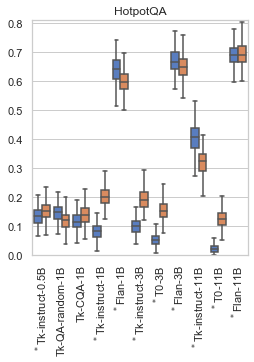

In [157]:
plt.xticks(rotation=90)
plt.title("HotpotQA")
g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "hotpot_qa/fullwiki"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)], showfliers=False)
# g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
plt.legend([],[], frameon=False)
plt.ylim((0, 0.81))
plt.tight_layout()

plt.savefig("hotpotqa_boxes.pdf", format="pdf")

In [147]:
# sns.set(rc={'figure.figsize': (6, 5)})
# sns.set(style="whitegrid")
# sns.set_palette("muted")

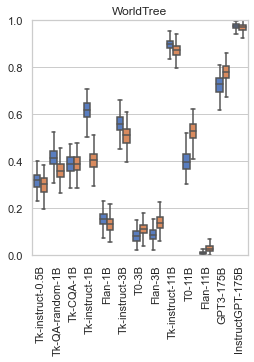

In [162]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)

plt.title("WorldTree")

g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "worldtree"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)], showfliers=False)
g.set(xlabel=None)
g.set(ylabel=None)

plt.legend([],[], frameon=False)
plt.ylim((0, 1))
plt.gcf().subplots_adjust(bottom=0.25)
plt.tight_layout()

plt.savefig("worldtree_boxes.pdf", format="pdf")

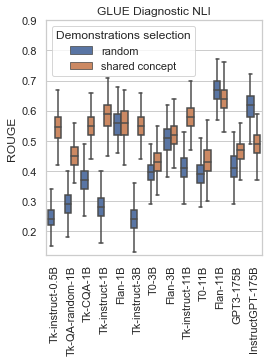

In [165]:
sns.set(rc={'figure.figsize': (3.9, 5.2)})
sns.set(style="whitegrid")
plt.xticks(rotation=90)
plt.title("GLUE Diagnostic NLI")

# sns.set(rc={'figure.figsize': (10, 7)})
# plt.tight_layout()
g = sns.boxplot(data=plotted_df[plotted_df["dataset"] == "glue/mnli"], x="model", y="ROUGE", hue="Demonstrations selection", conf_intervals=[(-0.05, 0.05)], showfliers=False)
g.set(xlabel=None)
# g.set(ylabel=None)
plt.ylim((0.12, 0.9))

plt.tight_layout()

# plt.legend([],[], frameon=False)
plt.savefig("glue_boxes.pdf", format="pdf")